In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

621

In [5]:
# Import the requests library.
import requests
from datetime import datetime
# Import the API key.
from config import weather_api_key

In [6]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
url

'http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=920ed6e264a39196fb8dfe55b03ce77e'

In [7]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

        
# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")    

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | grand baie
Processing Record 2 of Set 1 | kichmengskiy gorodok
Processing Record 3 of Set 1 | saldanha
Processing Record 4 of Set 1 | shubarkuduk
Processing Record 5 of Set 1 | rikitea
Processing Record 6 of Set 1 | muriti
Processing Record 7 of Set 1 | sorvag
City not found. Skipping...
Processing Record 8 of Set 1 | marsh harbour
Processing Record 9 of Set 1 | ye
City not found. Skipping...
Processing Record 10 of Set 1 | kodiak
Processing Record 11 of Set 1 | mar del plata
Processing Record 12 of Set 1 | vaini
Processing Record 13 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 14 of Set 1 | ambon
Processing Record 15 of Set 1 | carmen
Processing Record 16 of Set 1 | bereda
Processing Record 17 of Set 1 | karratha
Processing Record 18 of Set 1 | saskylakh
Processing Record 19 of Set 1 | tuatapere
Processing Record 20 of Set 1 | punta arenas
Processing Record 21 of Set

Processing Record 35 of Set 4 | chifeng
Processing Record 36 of Set 4 | pointe michel
Processing Record 37 of Set 4 | soyo
Processing Record 38 of Set 4 | dunedin
Processing Record 39 of Set 4 | tasbuget
City not found. Skipping...
Processing Record 40 of Set 4 | inuvik
Processing Record 41 of Set 4 | sinkat
City not found. Skipping...
Processing Record 42 of Set 4 | port alfred
Processing Record 43 of Set 4 | peniche
Processing Record 44 of Set 4 | port hardy
Processing Record 45 of Set 4 | barrow
Processing Record 46 of Set 4 | umzimvubu
City not found. Skipping...
Processing Record 47 of Set 4 | licata
Processing Record 48 of Set 4 | te anau
Processing Record 49 of Set 4 | rawson
Processing Record 50 of Set 4 | bosaso
Processing Record 1 of Set 5 | gawler
Processing Record 2 of Set 5 | bafq
Processing Record 3 of Set 5 | biltine
Processing Record 4 of Set 5 | hofn
Processing Record 5 of Set 5 | iisalmi
Processing Record 6 of Set 5 | cockburn harbour
City not found. Skipping...
Proce

City not found. Skipping...
Processing Record 21 of Set 8 | montepuez
Processing Record 22 of Set 8 | esperance
Processing Record 23 of Set 8 | kautokeino
Processing Record 24 of Set 8 | kiama
Processing Record 25 of Set 8 | port victoria
Processing Record 26 of Set 8 | wamba
Processing Record 27 of Set 8 | ulagan
Processing Record 28 of Set 8 | catamarca
Processing Record 29 of Set 8 | kalmunai
Processing Record 30 of Set 8 | jabinyanah
Processing Record 31 of Set 8 | fez
Processing Record 32 of Set 8 | corn island
Processing Record 33 of Set 8 | olinda
Processing Record 34 of Set 8 | eureka
Processing Record 35 of Set 8 | campos belos
Processing Record 36 of Set 8 | falealupo
City not found. Skipping...
Processing Record 37 of Set 8 | werda
Processing Record 38 of Set 8 | comodoro rivadavia
Processing Record 39 of Set 8 | kamaishi
Processing Record 40 of Set 8 | huarmey
Processing Record 41 of Set 8 | nelson bay
Processing Record 42 of Set 8 | talnakh
Processing Record 43 of Set 8 | 

Processing Record 11 of Set 12 | bandarbeyla
Processing Record 12 of Set 12 | wagar
Processing Record 13 of Set 12 | samarai
Processing Record 14 of Set 12 | tomatlan
Processing Record 15 of Set 12 | veraval
Processing Record 16 of Set 12 | zhuanghe
Processing Record 17 of Set 12 | togur
Processing Record 18 of Set 12 | umarizal
Processing Record 19 of Set 12 | nakamura
Processing Record 20 of Set 12 | shieli
Processing Record 21 of Set 12 | kastamonu
Processing Record 22 of Set 12 | neiafu
Processing Record 23 of Set 12 | sola
Processing Record 24 of Set 12 | burnie
Processing Record 25 of Set 12 | monrovia
Processing Record 26 of Set 12 | bayan
Processing Record 27 of Set 12 | gharo
Processing Record 28 of Set 12 | henties bay
Processing Record 29 of Set 12 | chicama
Processing Record 30 of Set 12 | verkhoyansk
Processing Record 31 of Set 12 | alpena
Processing Record 32 of Set 12 | tabiauea
City not found. Skipping...
Processing Record 33 of Set 12 | meadow lake
Processing Record 34

In [8]:
len(city_data)

566

In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Grand Baie,-20.0182,57.5802,77.00,87,18,1.01,MU,2021-03-25 01:02:15
1,Kichmengskiy Gorodok,59.9816,45.7854,34.48,92,96,11.27,RU,2021-03-25 01:02:15
2,Saldanha,-33.0117,17.9442,69.80,68,0,2.30,ZA,2021-03-25 01:02:15
3,Shubarkuduk,49.1447,56.4872,31.77,90,100,22.46,KZ,2021-03-25 01:02:16
4,Rikitea,-23.1203,-134.9692,79.45,73,10,14.43,PF,2021-03-25 01:02:16
5,Muriti,-1.9833,32.9167,74.03,69,56,10.29,TZ,2021-03-25 01:02:17
6,Marsh Harbour,26.5412,-77.0636,75.99,74,2,3.76,BS,2021-03-25 01:02:17
7,Kodiak,57.7900,-152.4072,44.60,57,75,6.91,US,2021-03-25 01:02:18
8,Mar Del Plata,-38.0023,-57.5575,70.00,88,75,3.44,AR,2021-03-25 01:02:18
9,Vaini,-21.2000,-175.2000,78.62,81,100,25.10,TO,2021-03-25 01:02:18


In [10]:
city_data_new_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']

In [12]:
city_data_df = city_data_df[city_data_new_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Grand Baie,MU,2021-03-25 01:02:15,-20.0182,57.5802,77.00,87,18,1.01
1,Kichmengskiy Gorodok,RU,2021-03-25 01:02:15,59.9816,45.7854,34.48,92,96,11.27
2,Saldanha,ZA,2021-03-25 01:02:15,-33.0117,17.9442,69.80,68,0,2.30
3,Shubarkuduk,KZ,2021-03-25 01:02:16,49.1447,56.4872,31.77,90,100,22.46
4,Rikitea,PF,2021-03-25 01:02:16,-23.1203,-134.9692,79.45,73,10,14.43


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

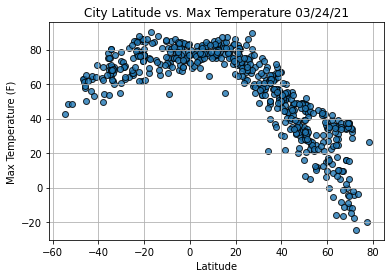

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

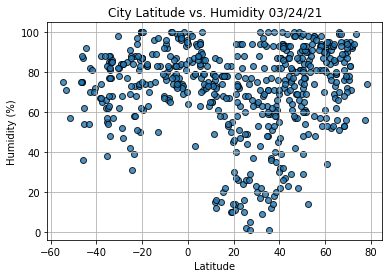

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

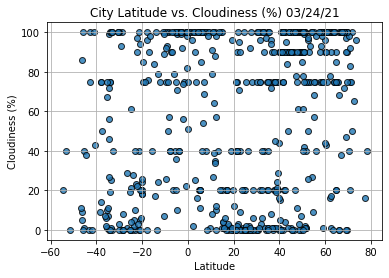

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

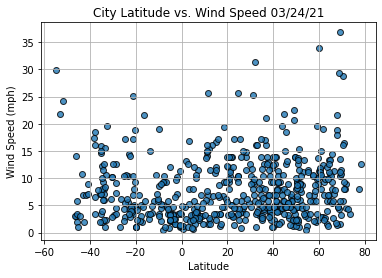

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()